In [ ]:
!pip install opencv-python-headless
!pip install tensorflow


In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import files

# Upload an image file from local to Colab
uploaded = files.upload()

# Load the image from uploaded files
image_path = list(uploaded.keys())[0]


Saving download.jpeg to download (4).jpeg


In [ ]:
IMG_SIZE = 32  # Make sure this matches the input size of your model

# Load and preprocess the uploaded image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to match model input size
img_array = img_to_array(img_resized) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension (for grayscale)


In [ ]:
# Modify the gesture_classes to match your model's output
gesture_classes = {
    0: 'Palm Open',    # Map this to class 0
    1: 'L Shape',      # Map this to class 1
    2: 'Thumb Up',     # Map this to class 2
    3: 'Fist Moved',   # Map this to class 3
    4: 'Thumb',        # Map this to class 4
    5: 'Index',        # Map this to class 5
    6: 'Peace',        # Map this to class 6
    7: 'Palm Moved',   # Map this to class 7
    8: 'C Shape',      # Map this to class 8
    9: 'Down'          # Map this to class 9
}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Gesture Class: Peace


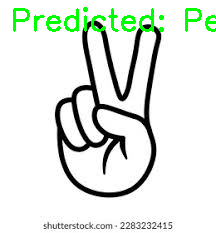

In [ ]:
# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Map the predicted class to the gesture label
predicted_label = gesture_classes[predicted_class]

print(f"Predicted Gesture Class: {predicted_label}")

# Display the uploaded image along with the predicted label
cv2_imshow(cv2.putText(cv2.imread(image_path), f"Predicted: {predicted_label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2))
